## Graduate Admission Prediction
Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [2]:
admission = pd.read_csv('data/Admission_Predict_Ver1.1.csv')
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


##### Observations:
1. Serial No. Column is an index for the data which is of no use
2. Chance of Admit is the label which we will separate out later
3. None of the columns have null data, which means we do not have to perform null check

In [5]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
admission = admission.drop('Serial No.', axis=1)
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Plotting

It is difficult to undestand the co-relation among various features, hence we need check the pairplot combination to gain more insight on the co-relation in a search to understand which feature is the most important feature for a UG student for Admissions 

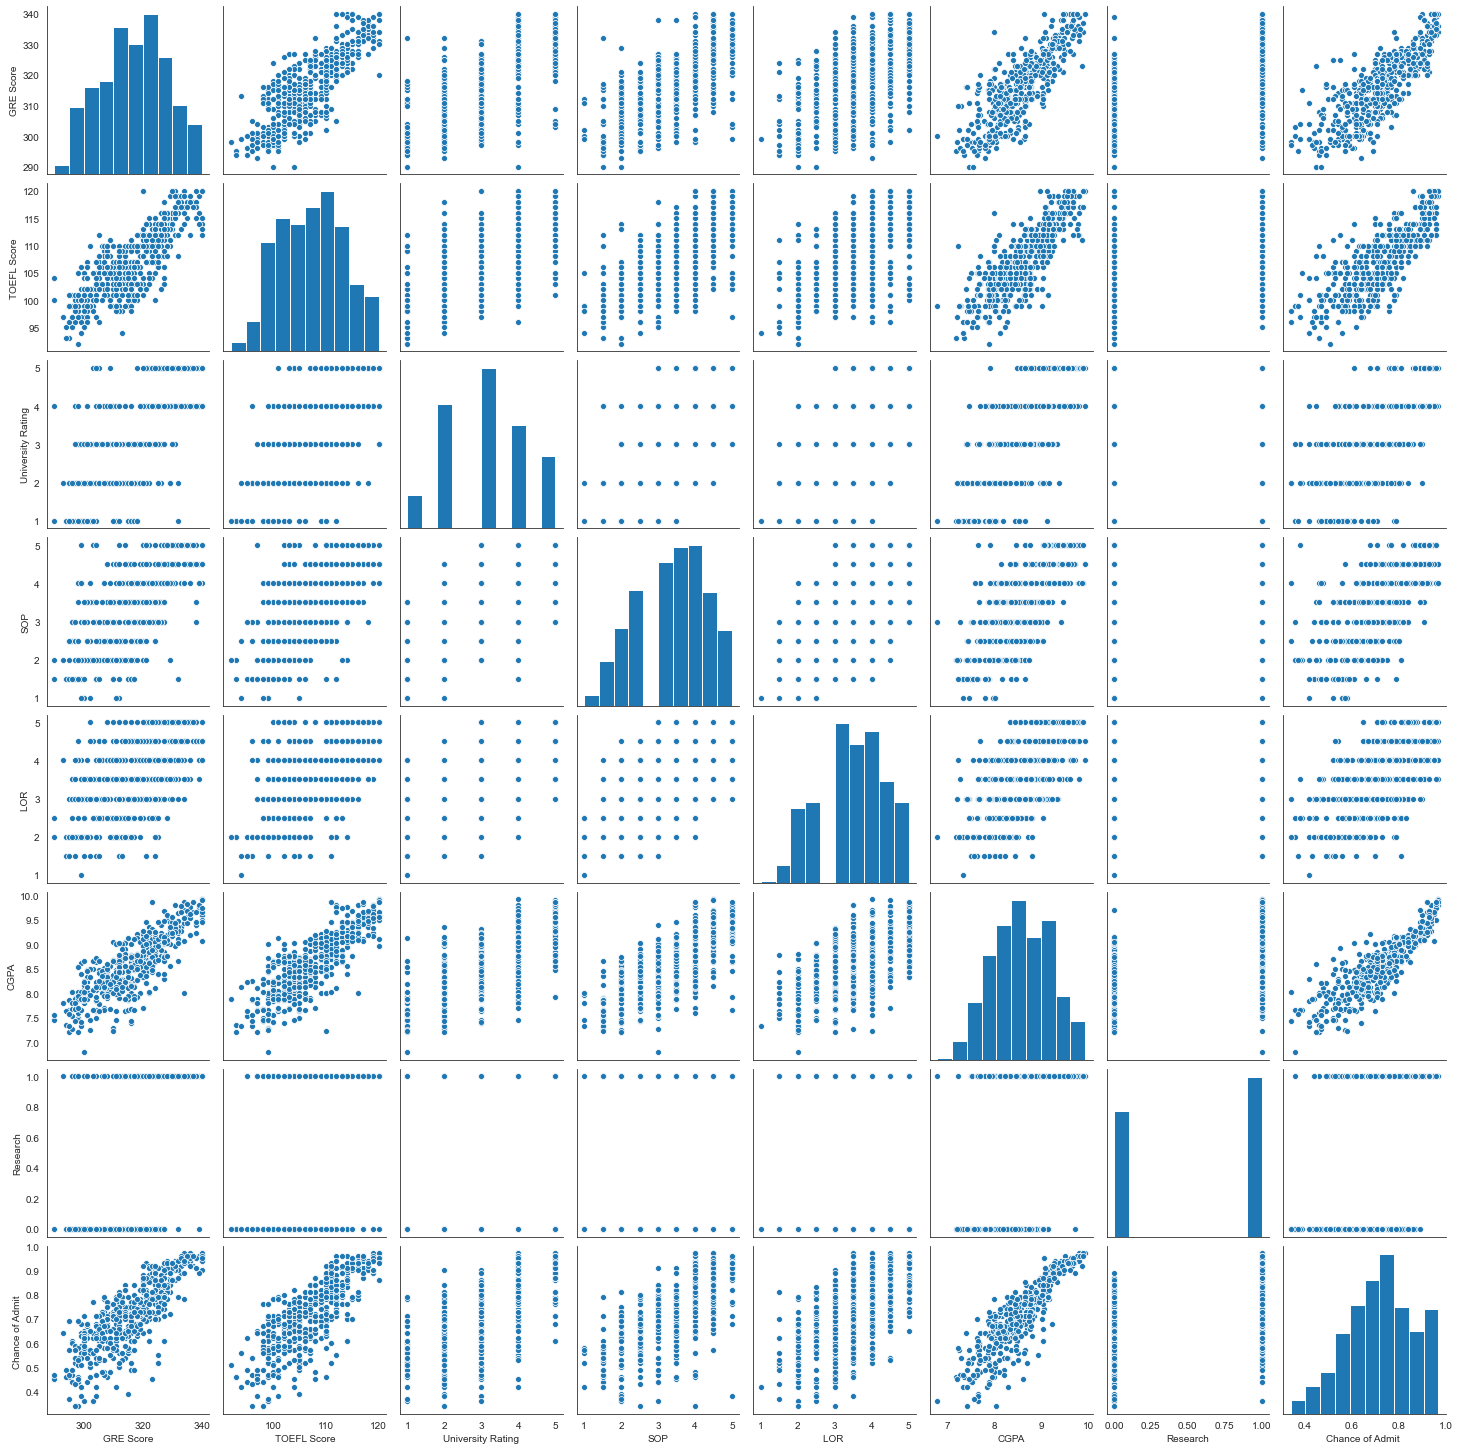

In [7]:
sns.pairplot(admission)

### Heatmap

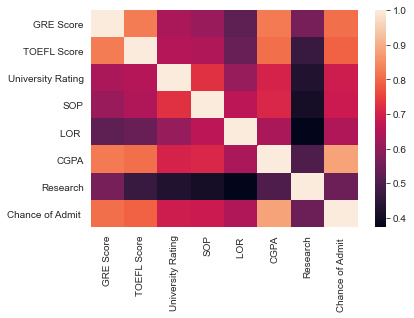

In [8]:
adm_corr = admission.corr()
sns.heatmap(adm_corr, 
           xticklabels=adm_corr.columns.values,
           yticklabels=adm_corr.columns.values)

### Classification:


##### Label: Chance of Admit
##### Features : ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']


In [9]:
## Separate the dependent and independent variables:
X = admission.drop('Chance of Admit ', axis=1)
y = admission['Chance of Admit ']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)

### Modelling - Random Forest Regressor

Random Forest Classifier has been used because RF adds additoinal randomness to the model while growing a large number of DTs to understand the underlying co-relation among the various features, and finding the most important feature by splitting the nodes among random subset of  features. \
Since we have a lot many features here out of which all seems to be the most important feature.\
Using RF adds a lot of diversity to the model

In [11]:
RF_model = RandomForestRegressor(n_estimators=100, random_state=365)
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=365)

###  Predictions

#### Mean Absolute Error



In [12]:
predictions = RF_model.predict(X_test)

# display mean_absolute_error
print("The MAE from Model: {:.4f}".format(mean_absolute_error(y_test, predictions)))

The MAE from Model: 0.0454


### Feature Importance

The RF model helps us understand the feature importance of the model. \
feature_importances_ property of the model is the impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Impurity-based feature importances can be misleading for high cardinality features (many unique values). 

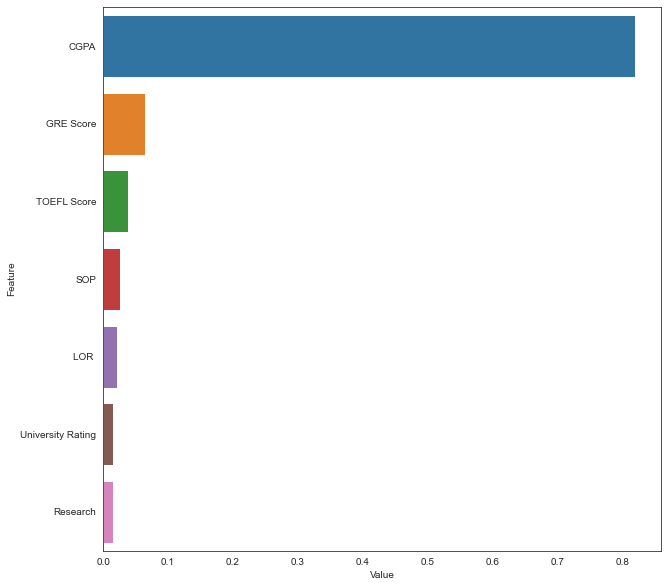

In [13]:
feature_importance = pd.DataFrame(sorted(zip(RF_model.feature_importances_, X.columns)), columns=['Value','Feature']) 
plt.figure(figsize=(10, 10)) 
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))

#### Final Observation

Here, we can see that CGPA is the most important feature. \
Followed by GRE Score, TOEFL, SOP, LOP, University Rating, Research. \
However, it is interesting to note from the pairplot Research/ Non-Researcher has been used as a binary metric. However, in reality it is a different story altogether. \
This is a case where we need more data and features on Research and the candidate for a correct Real-World scenario.

#### User Chance of Admit Prediction:

##### Please enter the following scores:
- GRE Score (Total GRE Score out of 340)
- TOEFL Score (Total TOEFL Score out of 120)
- University Rating (World University Rating on a scale of 1-5, with 1 being the best)
- SOP (rate your SOP on a scale of 1-5)
- LOR (rate your LORs on a scale of 1-5)
- CGPA (Your UG CGPA on a scale of 1-10 (not %age))
- Research: 1 | 0 (Yes/ No)

In [24]:
## User Score Prediction
user_story = {
    'GRE Score': 320, 
    'TOEFL Score': 110, 
    'University Rating': 3, 
    'SOP': 3.5,
    'LOR ': 3, 
    'CGPA': 7.99, 
    'Research': 1,
}

user_ds = pd.Series(user_story)
user_ds_arr = user_ds.values.reshape(1,-1)
user_admit = RF_model.predict(user_ds_arr)

print("Based on the Scores entered, your Chances of Admit is: {:.2f}%".format(user_admit[0]*100))

Based on the Scores entered, your Chances of Admit is: 67.55%


##### If you liked this notebook, consider following me on GitHub!